In [1]:
import pandas as pd
import numpy as np

In [3]:
# !pip install ffmpeg-quality-metrics

In [13]:
from ffmpeg_quality_metrics import FfmpegQualityMetrics

In [23]:
file1 = "C\\:/Users/vanes/Documents/CourseMaterial/FCN/Project/motion_video_1080.mp4"
file2 = r"C:\Users\vanes\Documents\CourseMaterial\FCN\Project\zoom_high_resolution_receiver_end.mp4"


In [347]:
# FfmpegQualityMetrics(file1, file1)#.calc(["ssim", "psnr"])

In [281]:
df = pd.read_excel("Flashes_tcp.xlsx")

In [339]:
tmp =  pd.read_excel("check.xlsx")

In [341]:
tmp = tmp.loc[:1000, ["Timestamp","Sender","Receiver"]]
tmp

In [343]:
tmp["Sender"] = tmp["Sender"]/4
tmp["Receiver"] = tmp["Receiver"]/4

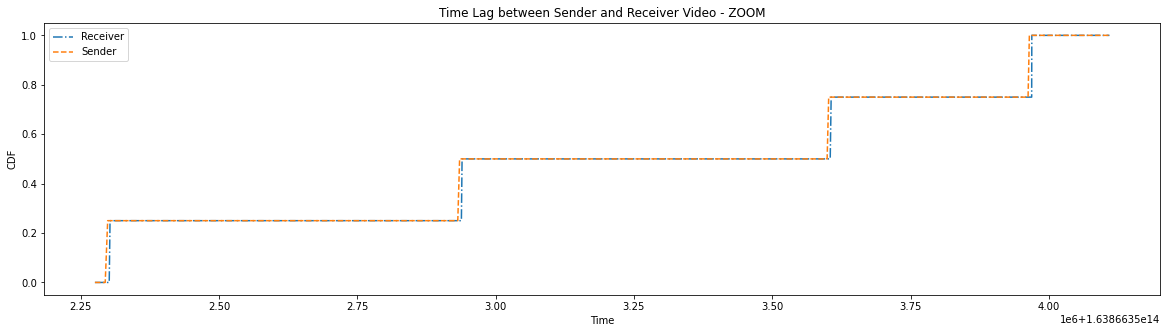

In [346]:
fig = plt.figure(figsize=(20,5))
plt.plot(tmp["Timestamp"], tmp["Sender"], '-.', label="Receiver", )
plt.plot(tmp["Timestamp"], tmp["Receiver"], "--", label="Sender")
plt.title("Time Lag between Sender and Receiver Video - ZOOM")
plt.ylabel("CDF")
plt.xlabel("Time")
plt.legend()
plt.show()

In [260]:
df['Timestamp1'] = df['Timestamp1'].apply(lambda x: x*100000)
df['Timestamp2'] = df['Timestamp2'].apply(lambda x: x*100000)

In [261]:
df = df.dropna()

In [262]:
df.columns

Index(['Timestamp1', 'isFlash', 'Unnamed: 2', 'Timestamp2', 'isFlash.1',
       'Unnamed: 5'],
      dtype='object')

In [263]:
# df = df[['Timestamp1', 'isFlash', 'Timestamp2', 'isFlash.1']]

In [264]:
# df = df.dropna()

In [265]:
df1 = df[['Timestamp1', 'isFlash', "Unnamed: 2"]].rename(columns={"Timestamp1":"Timestamp"})
df2 = df[['Timestamp2', 'isFlash.1', "Unnamed: 5"]].rename(columns={"Timestamp2":"Timestamp"})

In [266]:
# df1['Timestamp'] = df1['Timestamp'].apply(lambda x: x*1000000)
# df2['Timestamp'] = df2['Timestamp'].apply(lambda x: x*1000000)

In [267]:
# df1['Timestamp'] = df1['Timestamp'].apply(int)
# df2['Timestamp'] = df2['Timestamp'].apply(int)

In [268]:
# df1 = df1.groupby("Timestamp").sum().reset_index()
# df2 = df2.groupby("Timestamp").sum().reset_index()

In [269]:
# df1["isFlash"] = df1["isFlash"].fillna(0)
# df2["isFlash.1"] = df2["isFlash.1"].fillna(0)

In [270]:
_df = df1.merge(df2, on="Timestamp", how="outer")

In [271]:
_df = _df.sort_values("Timestamp")

In [273]:
_df.to_excel("check.xlsx")

In [244]:
_df = _df.fillna(0)

In [246]:
_df

,Timestamp,isFlash,Unnamed: 2,isFlash.1,Unnamed: 5
0,1.638664e+14,0.0,0.0,0.0,0.0
1,1.638664e+14,0.0,0.0,0.0,0.0
2,1.638664e+14,0.0,0.0,0.0,0.0
3,1.638664e+14,0.0,0.0,0.0,0.0
4,1.638664e+14,0.0,0.0,0.0,0.0
...,...,...,...,...,...
18671,1.638664e+14,0.0,0.0,0.0,156.0
18672,1.638664e+14,0.0,0.0,0.0,156.0
18673,1.638664e+14,0.0,0.0,0.0,156.0
18674,1.638664e+14,0.0,0.0,0.0,156.0


In [247]:
_df["isFlash_sender_cumsum"] = _df["isFlash"].cumsum()
_df["isFlash_receiver_cumsum"] = _df["isFlash.1"].cumsum()

In [248]:
# _df.sample(20)

,Timestamp,isFlash,Unnamed: 2,isFlash.1,Unnamed: 5,isFlash_sender_cumsum,isFlash_receiver_cumsum
15345,1.638664e+14,0.0,0.0,0.0,114.0,114.0,114.0
6577,1.638664e+14,0.0,124.0,0.0,0.0,124.0,124.0
5728,1.638664e+14,0.0,107.0,0.0,0.0,107.0,107.0
6175,1.638664e+14,0.0,118.0,0.0,0.0,118.0,118.0
14013,1.638664e+14,0.0,0.0,0.0,87.0,87.0,87.0
6125,1.638664e+14,0.0,117.0,0.0,0.0,117.0,117.0
9790,1.638664e+14,0.0,0.0,0.0,2.0,2.0,2.0
4032,1.638664e+14,0.0,71.0,0.0,0.0,71.0,71.0
1961,1.638664e+14,0.0,24.0,0.0,0.0,24.0,24.0
9138,1.638664e+14,0.0,156.0,0.0,0.0,156.0,156.0


In [107]:
# _df = df.loc[:5000]

In [249]:
_df["isFlash_receiver_cumsum"] = _df["isFlash_receiver_cumsum"]/156
_df["isFlash_sender_cumsum"] = _df["isFlash_sender_cumsum"]/156

In [250]:
_df.sample(50)

,Timestamp,isFlash,Unnamed: 2,isFlash.1,Unnamed: 5,isFlash_sender_cumsum,isFlash_receiver_cumsum
4359,1.638664e+14,0.0,79.0,0.0,0.0,0.506410,0.506410
10854,1.638664e+14,0.0,0.0,0.0,18.0,0.115385,0.115385
8866,1.638664e+14,0.0,156.0,0.0,0.0,1.000000,1.000000
12209,1.638664e+14,0.0,0.0,0.0,45.0,0.288462,0.288462
1652,1.638664e+14,0.0,18.0,0.0,0.0,0.115385,0.115385
1393,1.638664e+14,0.0,18.0,0.0,0.0,0.115385,0.115385
9569,1.638664e+14,0.0,0.0,0.0,0.0,0.000000,0.000000
14815,1.638664e+14,0.0,0.0,0.0,104.0,0.666667,0.666667
14108,1.638664e+14,0.0,0.0,0.0,88.0,0.564103,0.564103
8915,1.638664e+14,0.0,156.0,0.0,0.0,1.000000,1.000000


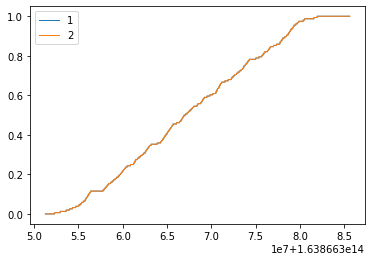

In [251]:
fig = plt.figure()
# dates1 = matplotlib.dates.date2num(df["Timestamp1_1"])
plt.plot(_df["Timestamp"], _df["isFlash_sender_cumsum"],linewidth=1, label="1")
# plt.plot(, df["isFlash_sender_cumsum"])
# dates2 = matplotlib.dates.date2num(df["Timestamp2_1"])

plt.plot(_df["Timestamp"], _df["isFlash_receiver_cumsum"],linewidth=1, label="2")
# plt.plot(df["Timestamp2_1"], df["isFlash_receiver_cumsum"])
plt.legend()
plt.show()

In [71]:
import matplotlib
import matplotlib.pyplot as plt

In [93]:
from datetime import datetime
df["Timestamp1_time"] = df["Timestamp1"].apply(lambda x: datetime.fromtimestamp(x).time())
df["Timestamp2_time"] = df["Timestamp2"].apply(lambda x: datetime.fromtimestamp(x).time())

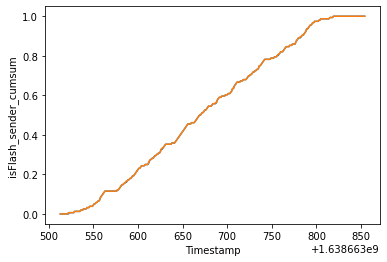

In [138]:
import seaborn as sns
sns.lineplot(data=_df, x="Timestamp", y="isFlash_sender_cumsum", )
sns.lineplot(data=_df, x="Timestamp", y="isFlash_receiver_cumsum")
plt.show()

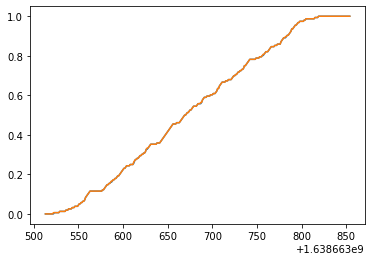

In [142]:
fig = plt.figure()
# dates1 = matplotlib.dates.date2num(df["Timestamp1_1"])
plt.plot(_df["Timestamp"], _df["isFlash_sender_cumsum"],linewidth=1.5, label="1")
# plt.plot(, df["isFlash_sender_cumsum"])
# dates2 = matplotlib.dates.date2num(df["Timestamp2_1"])

plt.plot(_df["Timestamp"], _df["isFlash_receiver_cumsum"],linewidth=1.5, label="2")
# plt.plot(df["Timestamp2_1"], df["isFlash_receiver_cumsum"])
plt.show()

In [42]:
df.sample(10)

,Timestamp1,isFlash,Timestamp2,isFlash.1,isFlash_sender_cumsum,isFlash_receiver_cumsum
2559,1.638664e+09,0,1.638664e+09,0.0,0.243590,0.243590
5718,1.638664e+09,0,1.638664e+09,0.0,0.679487,0.692308
5313,1.638664e+09,0,1.638664e+09,0.0,0.634615,0.641026
3155,1.638664e+09,0,1.638664e+09,0.0,0.333333,0.339744
756,1.638664e+09,0,1.638664e+09,0.0,0.025641,0.025641
5536,1.638664e+09,0,1.638664e+09,0.0,0.673077,0.673077
3994,1.638664e+09,0,1.638664e+09,0.0,0.455128,0.455128
4988,1.638664e+09,0,1.638664e+09,0.0,0.596154,0.596154
4563,1.638664e+09,1,1.638664e+09,0.0,0.544872,0.544872
1293,1.638664e+09,0,1.638664e+09,0.0,0.089744,0.096154


In [51]:
from datetime import date, time


1638663512.69821